<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score

# отключить некритические предупреждения в коде
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/Churn.csv', index_col=0)

In [3]:
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Описание данных:

Признаки:

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Целевой признак:

Exited — факт ухода клиента

In [5]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop(columns=['CustomerId','Surname'],axis=1,inplace=True) #удалим столбцы,которые не потребуются для анализа

In [7]:
df.columns = df.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [8]:
df_ohe = pd.get_dummies(df, drop_first=True) #избежим ловушку фиктивных признаков

In [9]:
df_ohe.duplicated().sum() #проверим на наличие дубликатов

0

In [10]:
df_ohe['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

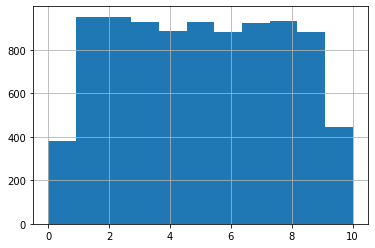

In [11]:
df_ohe['tenure'].hist(bins=11)
plt.show()

In [12]:
df = (np.random.randint(0,10,size=df_ohe['tenure'].isna().sum()))#заполним пропуски случайным числом
df_ohe.loc[df_ohe['tenure'].isna(),'tenure']= df

In [13]:
df_ohe['tenure'].astype(int) #преобразуем тип данных 

RowNumber
1         2
2         1
3         8
4         1
5         2
         ..
9996      5
9997     10
9998      7
9999      3
10000     4
Name: tenure, Length: 10000, dtype: int64

In [14]:
df_ohe.isna().sum()#посмотрим на наличие пропусков

creditscore          0
age                  0
tenure               0
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
geography_Germany    0
geography_Spain      0
gender_Male          0
dtype: int64

In [15]:
df_ohe['exited'].value_counts() #дисбаланс классов

0    7963
1    2037
Name: exited, dtype: int64

## Исследование задачи

In [22]:
target=df_ohe['exited'] #целевой признак
features=df_ohe.drop('exited',axis=1) #признаки

Разделим на выборки

In [23]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

In [24]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,
493,639,38,4.0,81550.94,2,0,1,118974.77,0,0,0
6656,554,44,1.0,85304.27,1,1,1,58076.52,0,0,1
4288,714,53,1.0,99141.86,1,1,1,72496.05,1,0,1
43,556,61,2.0,117419.35,1,1,1,94153.83,0,0,0
8179,707,46,7.0,127476.73,2,1,1,146011.55,0,0,0


Нормируем числовые данные

In [18]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)

print(features_train.shape)
print(features_valid.shape)

(6000, 11)
(2000, 11)


In [19]:
features[target==0].shape,features[target==1].shape #дисбаланс классов

((7963, 11), (2037, 11))

Дисбаланс отлицательного класса в 4 раза больше положительного

Исследуем модели на несбалансированных классах.

In [ ]:
for depth in range(1,21):    #дерево решений
    model_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_tree.fit(features_train, target_train)
    predictions = model_tree.predict(features_valid)
    print('max_depth:', depth,'F1:', f1_score(target_valid, predictions))

Лучшая модель: max_depth: 7 F1: 0.5557299843014128

In [ ]:
for max_depth in range(1,20):      #случайный лес
    model_forest = RandomForestClassifier(max_depth=max_depth, n_estimators=50, random_state=1234)
    model_forest.fit(features_train, target_train)
    predictions = model_forest.predict(features_valid)
    print('max_depth:',max_depth,'F1:', f1_score(target_valid, predictions))

Лучшая модель: max_depth: 15 F1: 0.5664556962025317

In [ ]:
for estim in range(1,100,5):
    model_forest = RandomForestClassifier(max_depth=14, n_estimators=estim, random_state=1234)
    model_forest.fit(features_train, target_train)
    predictions = model_forest.predict(features_valid)
    print('estim',estim,'F1:',f1_score(target_valid, predictions))

Лучшая модель : estim 76 F1: 0.5718799368088467

In [ ]:
model_logistic = LogisticRegression().fit(features_train, target_train)
predictions = model_logistic.predict(features_valid)
print('F1:', f1_score(target_valid, predictions))#логистическая регрессия

Лучшая модель : F1: 0.30131826741996237

Из 3 рассмотренных моделей лучший показатель у случайного леса , при параметрах :

max_depth: 15 F1: 0.5664556962025317

estim 76 F1: 0.5718799368088467

## Борьба с дисбалансом

Применим функцию upsampling & downsampling для балансироваки классов

In [ ]:
def upsample(features, target, repeat):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.DataFrame(target[target == 0])
    target_ones = pd.DataFrame(target[target == 1])

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

In [ ]:
def downsample(features, target, fraction):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.DataFrame(target[target == 0])
    target_ones = pd.DataFrame(target[target == 1])

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

При борьбе с дисбалансом функция Upsampling & Downsampling дала результат F1 = 0.47368421052631576

Обучение моделей на сбалансированных классах 

In [ ]:
for depth in range(1,20,1): #дерево решений
    model_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=1234).fit(features_upsampled, target_upsampled)
  
    predictions = model_tree.predict(features_valid)
    print('max_depth:', depth, 'F1:', f1_score(target_valid, predictions))

Лучшая модель после балансировки классов : max_depth: 7 F1: 0.5544354838709676

In [ ]:
for max_depth in range(1,20):      #случайный лес
    model_forest = RandomForestClassifier(class_weight='balanced',max_depth=max_depth, n_estimators=50, random_state=1234)
    model_forest.fit(features_train, target_train)
    predictions = model_forest.predict(features_valid)
    print('max_depth:', max_depth,'F1:', f1_score(target_valid, predictions))

In [ ]:
for estim in range(1,100, 5): #дерево решений
    model_forest = RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=estim, random_state=1234).fit(features_downsampled, target_downsampled)
    predictions = model_forest.predict(features_valid)
    print('estim:', estim, 'F1:', f1_score(target_valid, predictions))


Лучшая модель после балансировки классов : 

max_depth: 10 F1: 0.6007509386733417

estim: 56 F1: 0.5790513833992095
        

In [ ]:
model_logistic = LogisticRegression(class_weight='balanced').fit(features_train, target_train) #логистическая регрессия
predictions = model_logistic.predict(features_valid)
print('F1:', f1_score(target_valid, predictions))

Лучшая модель после балансировки классов : F1: 0.4755120213713268

Из 3 рассмотренных моделей после балансировки классов  лучший показатель у случайного леса , при параметрах : 

max_depth: 10 F1: 0.6007509386733417

estim: 56 F1: 0.5790513833992095
        


Вспомним , что до балансировки лучший показатель у случайного леса , при параметрах :

max_depth: 15 F1: 0.5664556962025317

estim 76 F1: 0.5718799368088467

## Тестирование модели

In [25]:
model_3 = RandomForestClassifier(class_weight='balanced', random_state=12345, max_depth=10, n_estimators=56)
model_3.fit(features_train, target_train)
predictions = model_3.predict(features_test)
print('F1:', f1_score(target_test,predictions))

F1: 0.6444708680142687


Иследование метркии ROC-auc 

In [ ]:
probabilities_tree = model_tree.predict_proba(features_valid) #вероятность класса#дерево решений
probabilities_one_valid_tree = probabilities_tree[:,1]
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)

auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)
auc_roc_tree

In [ ]:
probabilities_forest = model_forest.predict_proba(features_valid) #случайный лес
probabilities_one_valid_forest = probabilities_forest[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
auc_roc_forest

In [ ]:
probabilities_reg = model_logistic.predict_proba(features_valid) #логистическая регрессия
probabilities_one_valid_reg = probabilities_reg[:,1]
fpr_log, tpr_log, thresholds = roc_curve(target_valid, probabilities_one_valid_reg)
auc_roc_reg = roc_auc_score(target_valid, probabilities_one_valid_reg)
auc_roc_reg

In [ ]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Логистическая регрессия', 'Дерево решения', 'Случайный лес'),
           loc= 'upper left');

## Вывод

Из всех 3 моделей до балансировки , после балансировки , после проверки на ROC-AUC (0.8488807363948634), лучший показатель имеет модель:

Случайный лес 

при параметрах (после балансировки):

max_depth: 10 F1: 0.6007509386733417

estim: 56 F1: 0.5790513833992095
        

Именно данная модель сможет предсказать уйдет ли клиент из банка .

В ходе выполнения работы использовали модель Random Forrest. 
Применили методы upsampling и downsampling к данным, и, подобрав параметры модели смогли получить значение F1-меры выше 0.59.